# Predicting Titanic Survivors

<img src='titanic.jpg' width='600'>

This [dataset](https://www.kaggle.com/c/titanic/data) contains information about 891 passengers who were aboard the ship when it sank in 1912. The goal is to predict whether the passengers survived or not.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization Prefrences.
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## About the Data

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_num = df[df.select_dtypes(exclude=['object']).columns]
df_num.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


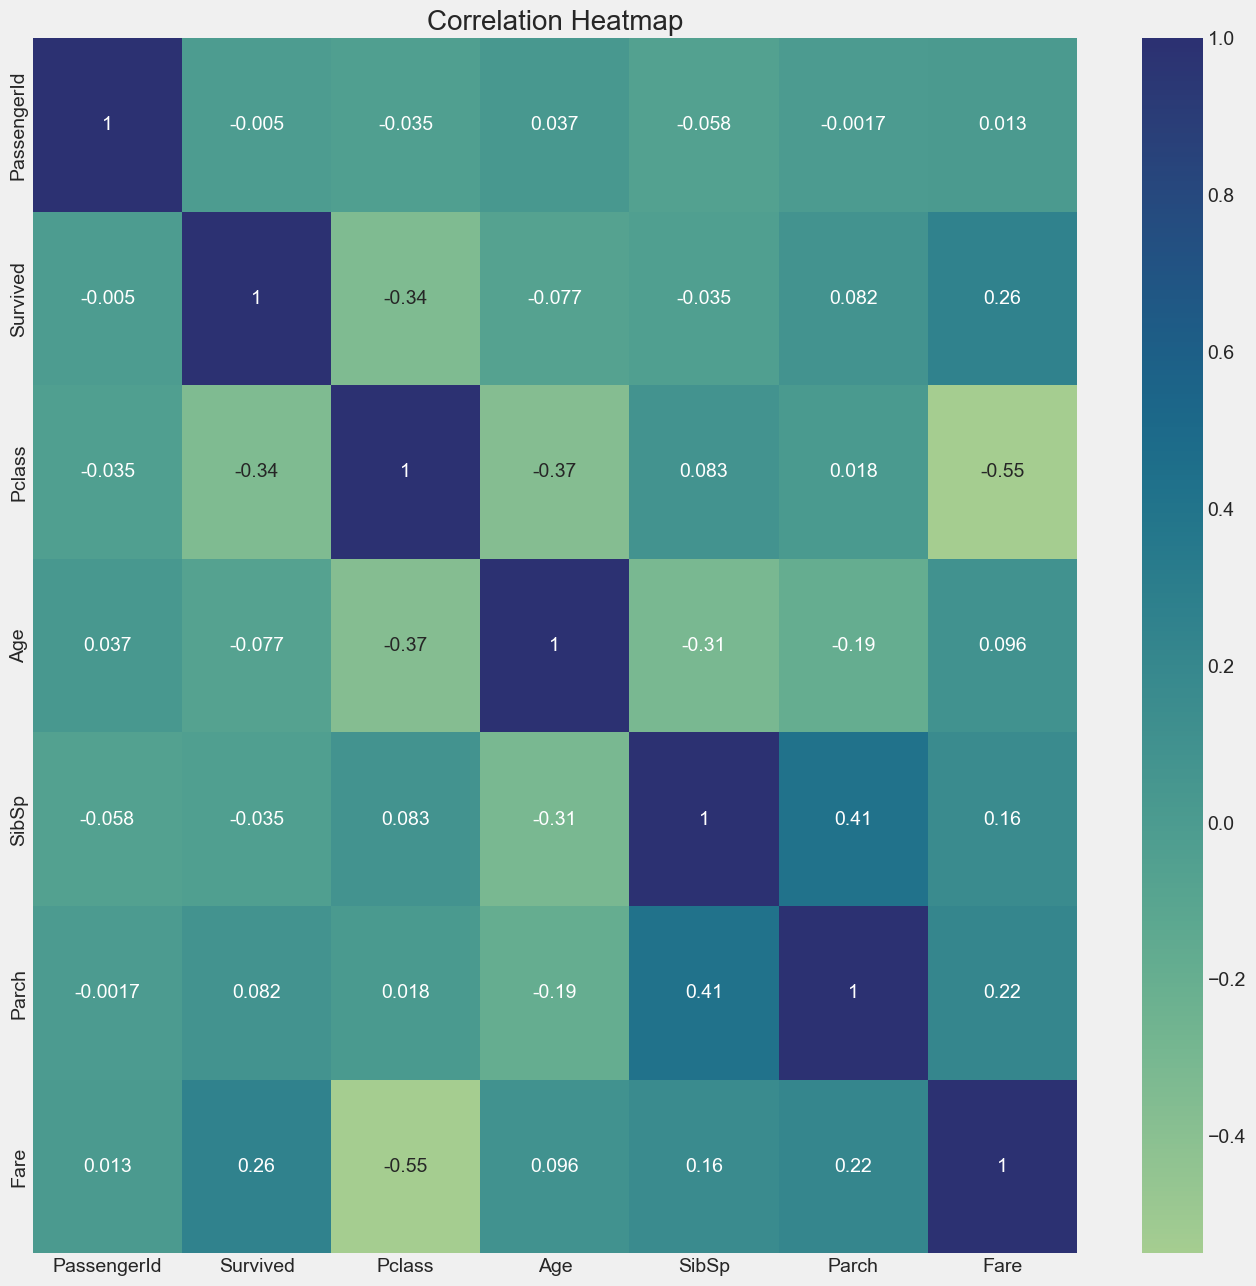

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_num.corr(), annot=True, cmap='crest')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

## Data Cleaning & Feature Engineering

### Checking for missing values

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing
missing_value(df)

,Missing Number,Missing Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


### Filling/removing missing values

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
df['Embarked'] = df['Embarked'].fillna(method='bfill')
df = df.drop(['Cabin'],axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Convert categorical features to numerical

In [15]:
df = df.drop(['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,False,True
1,2,1,1,female,38.0,1,0,71.2833,False,False
2,3,1,3,female,26.0,0,0,7.9250,False,True
3,4,1,1,female,35.0,1,0,53.1000,False,True
4,5,0,3,male,35.0,0,0,8.0500,False,True


In [17]:
# Convert gender category to numeric
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Convert Embarked category to numeric
for col in ['Embarked_Q', 'Embarked_S']:
    df[col] = df[col].map({True: 1, False: 0})
    
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1


## Classification Models

### 1 — Logistic Regression

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
feature_cols = [col_name for col_name in df.columns if col_name != 'Survived']

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(df[feature_cols], df.Survived))
# Create the dataframes
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'Survived']

X_test  = df.loc[test_idx, feature_cols]
y_test  = df.loc[test_idx, 'Survived']

In [19]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_0 = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.820809,0.757895,0.798507,0.789352,0.796629
recall,0.860606,0.699029,0.798507,0.779818,0.798507
f1-score,0.840237,0.727273,0.798507,0.783755,0.796821
support,165.000000,103.000000,0.798507,268.000000,268.000000


In [20]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
y_pred_1 = lr_l1.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_1, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.824561,0.752577,0.798507,0.788569,0.796896
recall,0.854545,0.708738,0.798507,0.781642,0.798507
f1-score,0.839286,0.730000,0.798507,0.784643,0.797284
support,165.000000,103.000000,0.798507,268.000000,268.000000


In [21]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred_2 = lr_l2.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.820809,0.757895,0.798507,0.789352,0.796629
recall,0.860606,0.699029,0.798507,0.779818,0.798507
f1-score,0.840237,0.727273,0.798507,0.783755,0.796821
support,165.000000,103.000000,0.798507,268.000000,268.000000


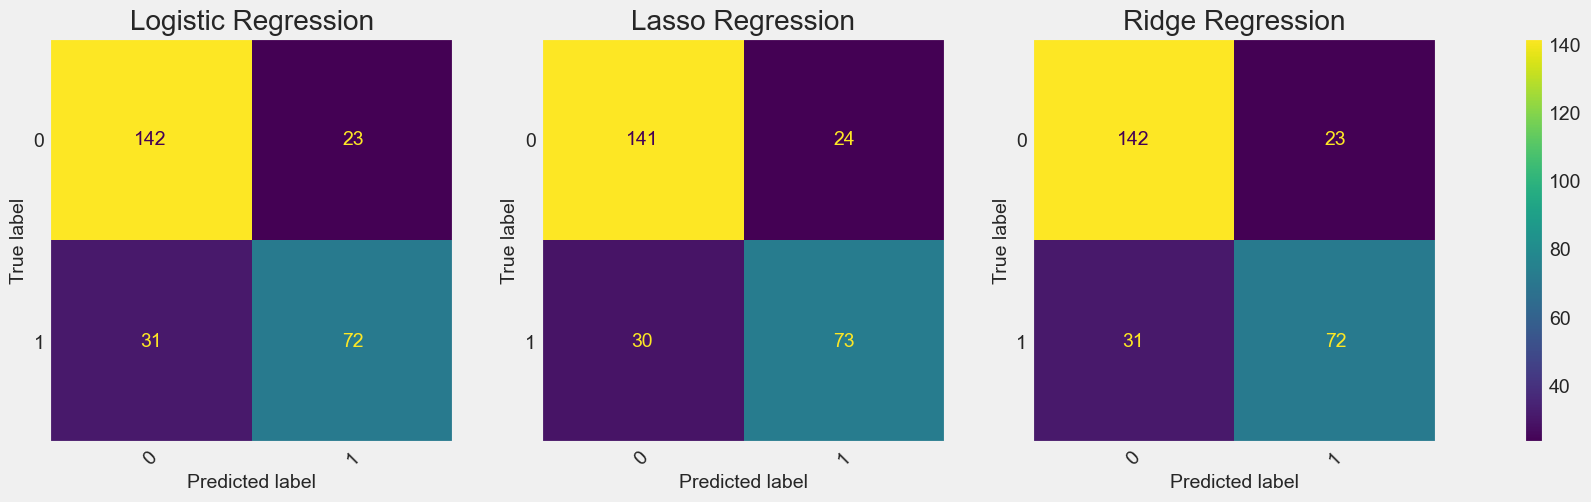

In [22]:
classifiers = {
    "Logistic Regression": lr,
    "Lasso Regression": lr_l1,
    "Ridge Regression": lr_l2
}

f, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.show()

### 2 — K-Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay

### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

# Get minimum error id 
min_error_id = error_results['Error Rate'].idxmin()

# Get Best K 
error_results.loc[min_error_id]

K             30.0000
Error Rate     0.3246
Name: 29, dtype: float64

In [24]:
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
KNN_report

,0,1,accuracy,macro avg,weighted avg
precision,0.665158,0.617021,0.656716,0.641090,0.646658
recall,0.890909,0.281553,0.656716,0.586231,0.656716
f1-score,0.761658,0.386667,0.656716,0.574162,0.617538
support,165.000000,103.000000,0.656716,268.000000,268.000000


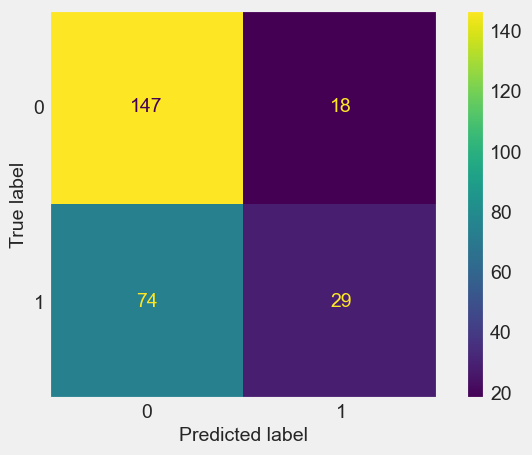

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

### 3 — XGBoost Classifier

In [26]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [5],
    "learning_rate": [0.05],
    "gamma": [0, 0.25, 1, 10],
    "reg_lambda": [0],
    "scale_pos_weight": [1, 3, 5, 7, 10],
    "subsample": [0.1,0.2, 0.3, 0.4, 0.5, 0.8],
    "colsample_bytree": [0.5,0.7],
}


# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [28]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 0,
 'scale_pos_weight': 5,
 'subsample': 0.5}

In [29]:
final_xgb_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

_ = final_xgb_cl.fit(X_train, y_train)

y_pred = final_xgb_cl.predict(X_test)

xgb_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
xgb_report

,0,1,accuracy,macro avg,weighted avg
precision,0.879699,0.644444,0.761194,0.762072,0.789284
recall,0.709091,0.844660,0.761194,0.776876,0.761194
f1-score,0.785235,0.731092,0.761194,0.758164,0.764426
support,165.000000,103.000000,0.761194,268.000000,268.000000


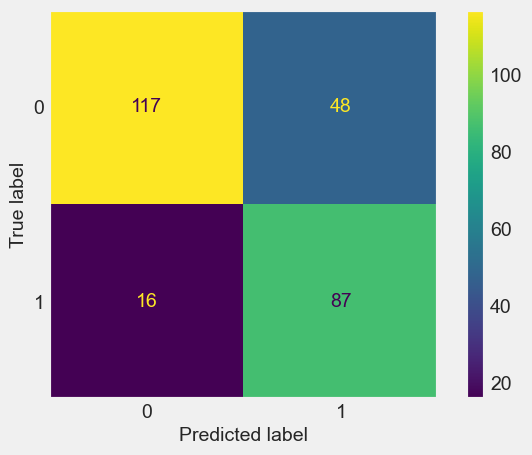

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=final_xgb_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_xgb_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()

### 4 — Support Vector Classifier

In [31]:
from sklearn.svm import SVC

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)

SVC_cl = svc.fit(X_train, y_train)
y_pred = SVC_cl.predict(X_test)
SVC_cl_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
SVC_cl_report

,0,1,accuracy,macro avg,weighted avg
precision,0.651639,0.750000,0.660448,0.700820,0.689442
recall,0.963636,0.174757,0.660448,0.569197,0.660448
f1-score,0.777506,0.283465,0.660448,0.530485,0.587632
support,165.000000,103.000000,0.660448,268.000000,268.000000


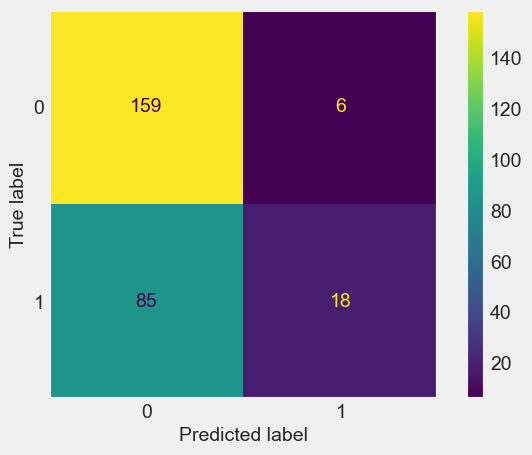

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=SVC_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()

### Comparing Models

In [35]:
# Logistic Regression
Y_pred = lr.predict(X_test)
log_train = round(lr.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

# K-Nearest Neighbors
Y_pred = knn.predict(X_test)
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

# XGBoost
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
Y_pred = xgb.predict(X_test)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

# Support Vector Classifier
Y_pred = svc.predict(X_test)
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

In [36]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'KNN', 'XGBoost', 'SVC'
    ],
    'Training Accuracy': [
        log_train, knn_train, xgb_train, svc_train 
    ],
    'Model Accuracy Score': [
        log_accuracy, knn_accuracy, xgb_accuracy, svc_accuracy
    ]
})

models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
1,KNN,100.00,65.67
2,XGBoost,99.84,77.61
0,Logistic Regression,80.58,79.85
3,SVC,66.61,66.04
